In [3]:
import sklearn
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 


In [4]:
from sklearn.datasets import load_iris

skd = load_iris()
skd

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
from sklearn.datasets import load_digits
load_digits().keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
load_digits().data.shape #모양 확인: (샘플의 갯수, Feature의 갯수)

(1797, 64)

In [7]:
load_digits().target.shape 

(1797,)

In [8]:
bunch = load_digits()

In [9]:
y= bunch.target
sp.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.bincount(y)   #sp에는 없는 명령어, 숫자별(feature별) 샘플 수를 알려줌

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

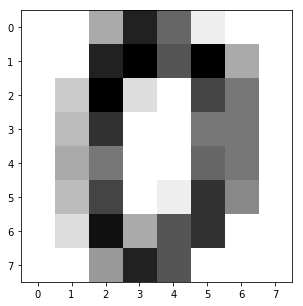

In [11]:
fig = plt.figure(figsize=(5,5))
plt.imshow(bunch.images[0], cmap='gray_r')
plt.show()

In [12]:
X, y = bunch.data, bunch.target

In [13]:
from sklearn.model_selection import train_test_split # X, y의 샘플 수는 반드시 일치해야 함

train_X, test_X, train_y, Train_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=123)

type(train_X)

numpy.ndarray

In [14]:
train_X.shape

(1257, 64)

In [15]:
test_X.shape

(540, 64)

In [16]:
train_y.shape

(1257,)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=123, solver='lbfgs', multi_class='multinomial')
modelfit = model.fit(train_X, train_y) # 모델 적합

train_predicted = modelfit.predict(train_X) # 모델 예측
train_predicted_prob = modelfit.predict_proba(train_X) # 확률 예측

test_predicted = modelfit.predict(test_X)

C:\Users\SunrokKwon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [18]:
modelfit.score(train_X, train_y)

1.0

In [19]:
np.sum(train_predicted == train_y)/np.shape(train_y)

array([1.])

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
model = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter==500, random_state=123)
modelfit = model.fit(train_X, train_Y)
modelfit.score(test_X, test_Y)

SyntaxError: positional argument follows keyword argument (<ipython-input-21-be2e94e122fa>, line 1)

In [22]:
df= pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Income1.csv", index_col=[0]) ## 처음 열을 인덱스로 사용

In [23]:
df.head()

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


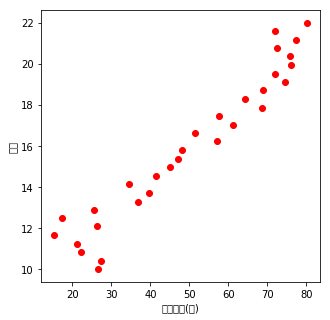

In [24]:
fig = plt.figure(figsize=(5,5))

X = df['Income']
Y = df['Education']
plt.scatter(X, Y, c='r')
plt.xlabel("교육기간(년)")
plt.ylabel("소득")
plt.show()

In [25]:
from sklearn.datasets import load_boston
X = load_boston()['data'] 
Y = load_boston()['target'] # 주택 중간 가격

X = X[:,5]
df = pd.DataFrame(sp.column_stack((X.reshape(-1,1),Y.reshape(-1,1))))
df.columns = ['RM', 'MEDV']
df.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


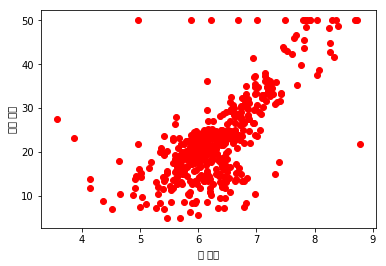

In [26]:
plt.scatter(X, Y, c='r')
plt.xlabel("방 개수")
plt.ylabel("주택 가격")
plt.show()

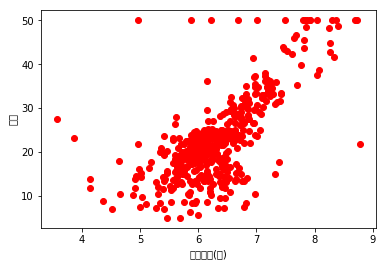

In [27]:
plt.scatter(df['RM'], df['MEDV'], c='r')
plt.xlabel("교육기간(년)")
plt.ylabel("소득")
plt.show()

In [28]:
## 13장. 분류문제와 로지스틱회귀분석
#1. Bank데이터 가져오기

df = pd.read_csv('../data/bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('../data/bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [31]:
df['num_y'] = pd.get_dummies(df['y'], drop_first=True) ## 문자 변수를 숫자 변수로 치환

In [32]:
# 범주형 변수명 가져오기 : 데이터 타입이 object인것만 가져옴
categorical_vars = df.drop(['y', 'num_y'], axis=1).columns[df.drop(['y', 'num_y'], axis=1).dtypes == 'object']

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,num_y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [34]:
# 숫자형 변수명 가져오기 : 데이터 타입이 object가 아닌 것만 가져옴
num_vars = df.drop(['y', 'num_y'], axis=1).columns[df.drop(['y', 'num_y'], axis=1).dtypes !='object']

In [35]:
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [36]:
num_vars

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [37]:
## 범주형 변수에 대한 가변수 구성하기 
dumm_data = pd.get_dummies(df[categorical_vars], prefix_sep='_', drop_first=True) ## drop_first: 첫번째 값에 대한 변수 삭제(왜?)

dumm_data.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
Xdf = df.join(dumm_data)[num_vars.tolist() + dumm_data.columns.tolist()]
Xdf.head()
X = Xdf.values

In [39]:
y = df['num_y'].values

In [40]:
## 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
## 로지스틱함수 적합

logisticModel = LogisticRegression(random_state=123)
logisticModel.fit(X_train, y_train)

C:\Users\SunrokKwon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
## 적합 결과
logisticModel.coef_ # Coefficient
logisticModel.intercept_

array([-0.866673])

In [43]:
# 예측
logisticModel.predict(X_test)
logisticModel.predict_proba(X_test)
df['num_y'].value_counts()
predicted = logisticModel.predict(X_test)
pd.Series(predicted).value_counts()
score = logisticModel.score(X_test,y_test) ## return mean accuracy, 정분류율 반환
score

0.8916728076639646

In [44]:
# Confusion Matrix (분류결과표)
metrics.confusion_matrix(y_test, predicted)

array([[1154,   26],
       [ 121,   56]], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

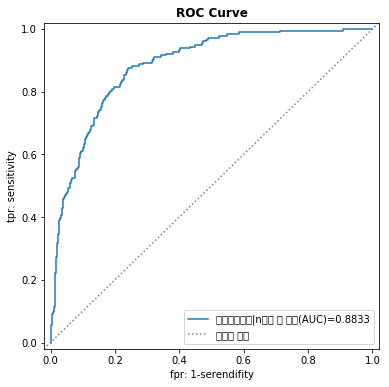

In [45]:
#모델에 의한 예측 확률 계산
y_pred_proba = logisticModel.predict_proba(X_test)[::,1]

#fpr: 1-특이도, tpr: 민감도, auc 계산
fpr, tpr, _ = metrics.roc_curve(y_true=y_test, y_score=y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#ROC 그래프 생성
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="로지스틱회귀|n곡선 밑 면적(AUC)=" + "%.4f"% auc)
plt.plot([-0.02, 1.02], [-0.02, 1.02], color='gray', linestyle=':', label='무작위 모델')
plt.margins(0)
plt.legend(loc=4)
plt.xlabel('fpr: 1-serendifity')
plt.ylabel('tpr: sensitivity')
plt.title("ROC Curve", weight='bold')
plt.legend()
plt.show
